**This project about :** 

Helping Retailer X to know who their customers are, and how to reach the right customers through targeted messaging:

•	They want to know what factors are associated with increased levels of spending in their stores.



**Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import types
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix


**Importing customer data file and printing the head of the data**

In [ ]:
Customer_data=pd.read_csv("Customer Data Set - Student 1 of 3.csv")
Customer_data.head()



,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


**Importing Product data file and printing the head of the data**

In [ ]:
Product_data=pd.read_csv("Product Data Set - Student 2 of 3.csv",sep='|' )
Product_data.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


**Importing Transactions data file and printing the head of the data**

In [ ]:
Transactions_data=pd.read_csv("Transaction Data Set - Student 3 of 3.csv",sep='|' )
Transactions_data.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


**Checking the shape of each data frame**

In [ ]:
Customer_data.shape


(500, 9)

From this output, we conclude that Retailer X served 500 customers

In [ ]:
Product_data.shape



(30, 3)

From this output, we conclude that Retailer X sells 30 products

In [ ]:
Transactions_data.shape

(10000, 6)

From this output, we conclude that Retailer X sells 30 products and served 500 customers in a total of 10,000 recorded transactions

**Verify that the files were read into a Pandas data frame**

In [ ]:
type(Customer_data)


pandas.core.frame.DataFrame

In [ ]:
type(Product_data)

pandas.core.frame.DataFrame

In [ ]:
type(Transactions_data)

pandas.core.frame.DataFrame

**Running the type command on a column like “AGE” indicates that a column on its own is a Pandas Series type.**

In [ ]:
type(Customer_data.AGE)


pandas.core.series.Series

**Look at the Pandas columns data types by using the dtypes**

In [ ]:
Customer_data.dtypes


CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME              object
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

**Remove the $ sign from INCOME by applying a string replace method.This task must be done to each element in the column by using a map function**

In [ ]:
Customer_data['INCOME']=Customer_data['INCOME'].map(lambda x : x.replace('$',''))
Customer_data.head(2)


,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"94,475",9,notenrolled,NaN,6,Married


**Convert strings to the int data type**

In [ ]:
Customer_data['INCOME']=Customer_data['INCOME'].map(lambda x : int(x.replace(',','')))
Customer_data.head(2)
Customer_data.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME               int64
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

**Gather some statistics about the data columns by using the function describe()**

In [ ]:
Customer_data["MARITAL STATUS"].describe()


count         500
unique          4
top       Married
freq          267
Name: MARITAL STATUS, dtype: object

In [ ]:
Customer_data["INCOME"].describe()

count       500.000000
mean      85792.482000
std       37157.766304
min       20256.000000
25%       52429.000000
50%       86846.500000
75%      118381.000000
max      149999.000000
Name: INCOME, dtype: float64

**Printing the array of all the unique values in this column**

In [ ]:
Customer_data["MARITAL STATUS"].unique()


array(['Single', 'Married', 'Divorced', 'Widow/Widower'], dtype=object)

**Change the data type of Enrollment date from object to a datetime object**

In [ ]:
from datetime import datetime
Customer_data['ENROLLMENT DATE']=Customer_data['ENROLLMENT DATE'][Customer_data['ENROLLMENT DATE'].notnull()].map(lambda x :datetime.strptime(x, '%d-%m-%Y') )


In [ ]:
Customer_data.dtypes

CUSTOMERID                   int64
GENDER                       int64
AGE                          int64
INCOME                       int64
EXPERIENCE SCORE             int64
LOYALTY GROUP               object
ENROLLMENT DATE     datetime64[ns]
HOUSEHOLD SIZE               int64
MARITAL STATUS              object
dtype: object

**Checking the null values in each data frame**

In [ ]:
print('null values for transactoins ?',Transactions_data.isnull().values.any())
print('null values for products ?',Product_data.isnull().values.any())
print('null values for customers ?',Customer_data.isnull().values.any())


null values for transactoins ? False
null values for products ? False
null values for customers ? True


**Printing the column(s) that has/have null values in customers data frame**

In [ ]:
Customer_data.columns[Customer_data.isna().any()].tolist()


['ENROLLMENT DATE']

# **Univariate Analysis**

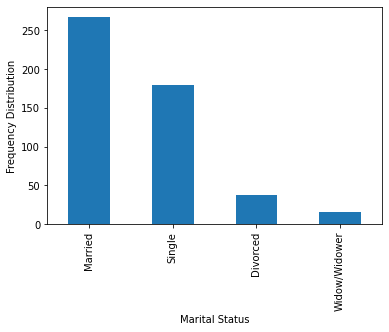

In [ ]:
Customer_data['MARITAL STATUS'].value_counts().plot(kind='bar')
plt.xlabel("Marital Status")
plt.ylabel("Frequency Distribution")
plt.show()

More than half of Retailer X customer base are married people, this might affect their choice of products and affect their overall spending

**Customers age distribution**

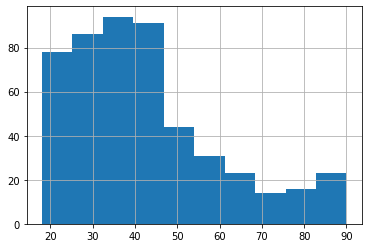

In [ ]:
Customer_data['AGE'].hist(bins=10)  
plt.show()

**Compare the results that are shown in the box plot to the Age variable summary statistics**

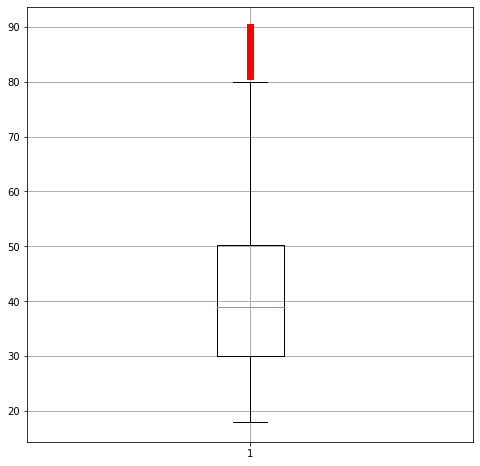

In [ ]:
plt.figure(figsize=(8,8))
plt.boxplot(Customer_data.AGE,0,'rs',1)
plt.grid(linestyle='-',linewidth=1)
plt.show()


In [ ]:
Customer_data['AGE'].describe()


count    500.000000
mean      42.316000
std       17.567509
min       18.000000
25%       30.000000
50%       39.000000
75%       50.250000
max       90.000000
Name: AGE, dtype: float64

# **Creating a Customer view**

**Create a Pandas frame that is called “trans_products” by joining transactions_data and product_data**

In [ ]:
Trans_products=Transactions_data.merge(Product_data,how='inner', left_on='PRODUCT NUM', right_on='PRODUCT CODE')
Trans_products.head()


,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,$25.46
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,$25.46
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,$25.46
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,$25.46
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,$25.46


**Change the type of Unit List Price column**

In [ ]:
Trans_products['UNIT LIST PRICE']=Trans_products['UNIT LIST PRICE'].map(lambda x : float(x.replace('$','')))
Trans_products.dtypes


CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
PRODUCT CODE            int64
PRODUCT CATEGORY       object
UNIT LIST PRICE       float64
dtype: object

**Derive a total price column for each transaction by multiplying quantity by unit price, and subtracting any discounts taken**

In [ ]:
Trans_products['Total_Price']=Trans_products['QUANTITY PURCHASED'] * Trans_products['UNIT LIST PRICE'] * (1- Trans_products['DISCOUNT TAKEN'])
Trans_products.head()


,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,Total_Price
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.840
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.760
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46,254.600
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46,305.520
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46,274.968


**Using the “groupby”, “agg” and “sort_values” functions**

In [ ]:
Income_by_product = Trans_products.groupby('PRODUCT CATEGORY').agg({'Total_Price':'sum'}).sort_values('Total_Price',ascending=False)
Income_by_product


,Total_Price
PRODUCT CATEGORY,
ELECTRONICS,1607192.422
APPAREL,936757.914
FOOD,96044.610
HEALTH & BEAUTY,54776.312


**pie chart and display the percentage of revenue for each product category**

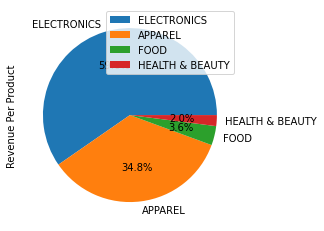

In [ ]:
Revenue_by_product=Income_by_product.rename(columns={'Total_Price':'Revenue Per Product'})
Revenue_by_product['Revenue Per Product'].plot(kind='pie',autopct='%1.1f%%',legend = True)


# **Total spends per category**

**Calculate the total spend per category**

In [ ]:
customer_prod_categ=Trans_products.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'Total_Price':'sum'})
customer_prod_categ.head()


Total_Price
CUSTOMER NUM PRODUCT CATEGORY             
10001        APPAREL              4022.430
             ELECTRONICS          1601.315
             FOOD                   68.688
             HEALTH & BEAUTY      1134.337
10002        APPAREL              2312.509

**Use the columns function to list the columns of a Pandas data frame**


In [ ]:
customer_prod_categ.columns


Index(['Total_Price'], dtype='object')

**Only Total_Price appears as the single column in the data frame, and that the other two columns, “Customer Num” and” Product category”, were not listed. This occurs because when you group by some columns, they change from a column to a multi- or a hierarchical index. To revert them back, use the reset_index() method.**

In [ ]:
customer_prod_categ.reset_index().head()


,CUSTOMER NUM,PRODUCT CATEGORY,Total_Price
0,10001,APPAREL,4022.430
1,10001,ELECTRONICS,1601.315
2,10001,FOOD,68.688
3,10001,HEALTH & BEAUTY,1134.337
4,10002,APPAREL,2312.509


In [ ]:
customer_prod_categ=customer_prod_categ.reset_index()

**Reorganize the data and create a summary report that shows the spending on each product category per customer. Use the “Pivot” function to create a pivot table**

In [ ]:
customer_pivot=customer_prod_categ.pivot(index='CUSTOMER NUM',columns='PRODUCT CATEGORY',values='Total_Price')
customer_pivot.head()


PRODUCT CATEGORY,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY
CUSTOMER NUM,,,,
10001,4022.430,1601.315,68.688,1134.337
10002,2312.509,2473.163,276.779,NaN
10003,2887.382,5414.418,260.640,NaN
10004,3637.213,1840.211,45.270,NaN
10005,213.512,NaN,NaN,NaN


NaN indicates that the customer did not buy any of this category

# **Total spends and most recent transactions by date**

**Convert the transaction date to a datetime object**

In [ ]:
Trans_products['TRANSACTION DATE']=Trans_products['TRANSACTION DATE'].map(lambda x :datetime.strptime(x, '%m/%d/%Y') )

**Calculate the measures by using the “groupby” and “agg” functions**

In [ ]:
recent_trans_total_spend=Trans_products.groupby('CUSTOMER NUM').agg({'TRANSACTION DATE':'max','Total_Price':'sum'}). rename(columns={'TRANSACTION DATE':'RECENT TRANSACTION DATE','Total_Price':'TOTAL SPENT'})
recent_trans_total_spend.head()


,RECENT TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,
10001,2015-12-24,6826.770
10002,2015-12-21,5062.451
10003,2015-12-31,8562.440
10004,2015-12-17,5522.694
10005,2015-12-22,213.512


**Create the join on the common index, which is Customer NUM**


In [ ]:
customer_KPIs=customer_pivot.merge(recent_trans_total_spend,how='inner',left_index=True, right_index=True )
customer_KPIs.head()



,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,NaN,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,NaN,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,NaN,2015-12-17,5522.694
10005,213.512,NaN,NaN,NaN,2015-12-22,213.512


**Replace the Null values with zeros by using the fillna function**

In [ ]:
customer_KPIs=customer_KPIs.fillna(0)
customer_KPIs.head()


,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694
10005,213.512,0.000,0.000,0.000,2015-12-22,213.512


**Augment this view with the customer original data set to provide a holistic view for Retailer X about its customers by performing another join**

In [ ]:
customer_all_view=Customer_data.merge(customer_KPIs,how='inner', left_on='CUSTOMERID', right_index=True)
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,2013-03-06,4,Single,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
1,10002,0,42,94475,9,notenrolled,NaT,6,Married,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451
2,10003,0,40,88610,9,enrolled,2010-09-02,5,Married,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440
3,10004,0,38,84313,8,enrolled,2015-04-06,1,Single,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694
4,10005,0,30,51498,3,notenrolled,NaT,1,Single,213.512,0.000,0.000,0.000,2015-12-22,213.512


# **Bivariate Analysis**

**Cross-tabulating gender with loyalty**

In [ ]:
table=pd.crosstab(customer_all_view['GENDER'],customer_all_view['LOYALTY GROUP'])
table


LOYALTY GROUP,enrolled,notenrolled
GENDER,,
0,131,120
1,133,116


**The numbers that are given in the table represent the frequency counts for the two factors together.plot this table in a bar chart**

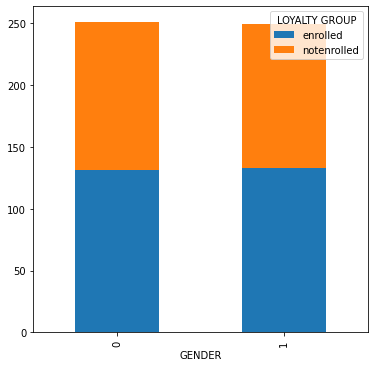

In [ ]:
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()


**Experience score**

In [ ]:
table=pd.crosstab(customer_all_view['EXPERIENCE SCORE'],customer_all_view['LOYALTY GROUP'])
table


LOYALTY GROUP,enrolled,notenrolled
EXPERIENCE SCORE,,
1,0,28
2,0,19
3,0,18
4,0,22
5,43,23
6,48,32
7,49,22
8,42,21
9,44,28


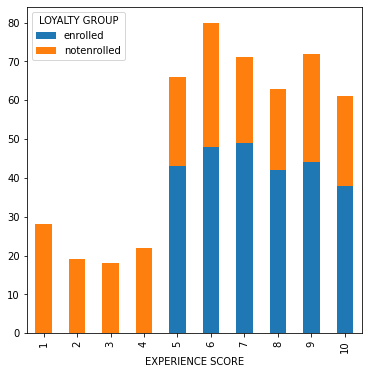

In [ ]:
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

**Do the same cross-tabulation for marital status**

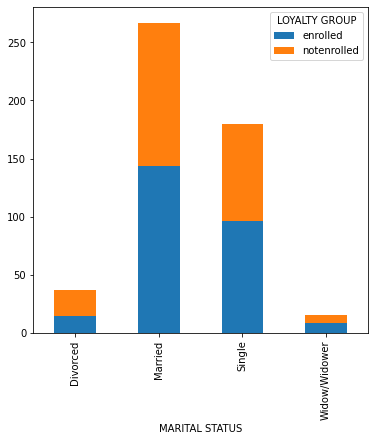

In [ ]:
table=pd.crosstab(customer_all_view['MARITAL STATUS'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

**See the significance of age regarding loyalty enrollment**

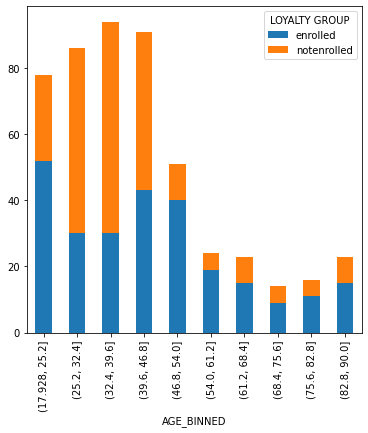

In [ ]:
customer_all_view['AGE_BINNED'] = pd.cut(customer_all_view['AGE'],10) # 10 bins of age
customer_all_view['AGE_BINNED'].value_counts()
table=pd.crosstab(customer_all_view['AGE_BINNED'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

**Using simple analysis, compare the means of the ages for both enrolled and not-enrolled customers by calculating an average age for each group**

In [ ]:
customer_all_view.groupby("LOYALTY GROUP").agg({'AGE':'mean'})

,AGE
LOYALTY GROUP,
enrolled,44.723485
notenrolled,39.622881


**This was a comparison of one summary statistic, which was the mean between two groups of enrollments**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


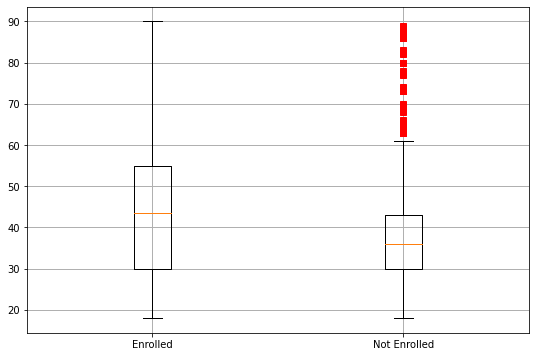

In [ ]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plot1=customer_all_view['AGE'][customer_all_view['LOYALTY GROUP'] == "enrolled"]
plot2=customer_all_view['AGE'][customer_all_view['LOYALTY GROUP'] == "notenrolled"]
list1=[plot1,plot2]
ax.boxplot(list1,0,'rs',1)
ax.set_xticklabels(['Enrolled', 'Not Enrolled'])
plt.grid( linestyle='-', linewidth=1)
plt.show()
customer_all_view['TOTAL SPENT BINNED'] = pd.cut(customer_all_view['TOTAL SPENT'],10) # 10 bins of age


**As total spend is a continuous variable, divide it into 10 discrete intervals and plot them as a stacked bar chart**

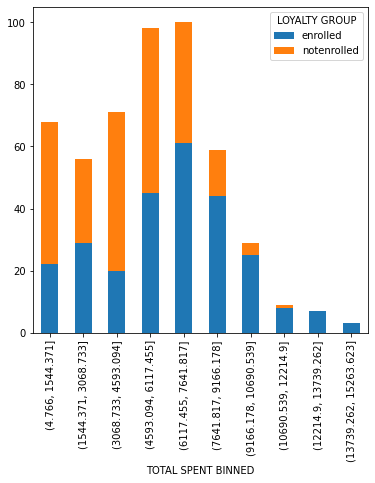

In [ ]:

table=pd.crosstab(customer_all_view['TOTAL SPENT BINNED'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()



# **Bivariate Analysis – Customer spend as a target variable**

**Age is a continuous variable, as is the total spend. Display them together in a scatter plot**

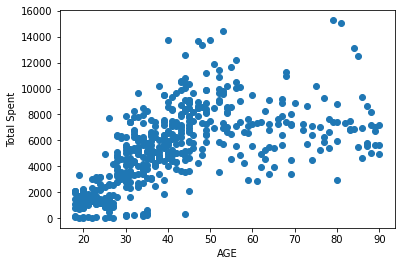

In [ ]:
plt.scatter(customer_all_view['AGE'],customer_all_view['TOTAL SPENT'])
plt.xlabel("AGE")
plt.ylabel("Total Spent")
plt.show()

**Use the “pearsonr” library to calculate the Pearson Correlation coefficient without considering the underlying math**

In [ ]:
from scipy.stats import pearsonr
pearsonr(customer_all_view['AGE'],customer_all_view['TOTAL SPENT'])



(0.5760170677259272, 1.560821750277651e-45)

**Income is a continuous variable. Create a scatter plot to show the relationship between income and total spend, and then calculate the Pearson correlation coefficient**

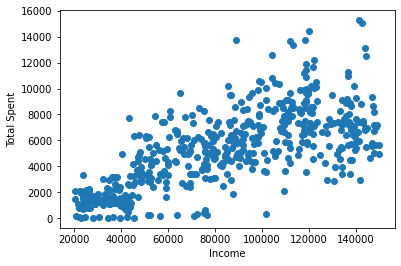

In [ ]:
from scipy.stats import pearsonr
pearsonr(customer_all_view['AGE'],customer_all_view['TOTAL SPENT'])
plt.scatter(customer_all_view['INCOME'],customer_all_view['TOTAL SPENT'])
plt.xlabel("Income")
plt.ylabel("Total Spent")
plt.show()

**Examine the relationship between the experience score (which is a categorical feature) and total spend (which is continuous)**

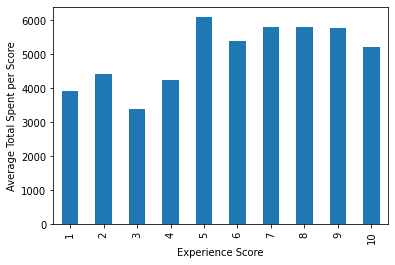

In [ ]:
table = customer_all_view.groupby(['EXPERIENCE SCORE']).agg({'TOTAL SPENT':'mean'}).reset_index()

table['TOTAL SPENT'].plot(kind='bar')
plt.xlabel("Experience Score")
plt.ylabel("Average Total Spent per Score")
plt.xticks([0,1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9,10])    
plt.show()

# **Machine Learning Phase**

**Features Selection using random forest algorithm**

In [ ]:
#split dataset in features and target variable
X = customer_all_view[['INCOME','AGE','EXPERIENCE SCORE','TOTAL SPENT','LOYALTY GROUP']]
X = X.drop('LOYALTY GROUP', axis=1)
y = customer_all_view['LOYALTY GROUP']
feature_cols=['INCOME','AGE','EXPERIENCE SCORE','TOTAL SPENT']


In [ ]:
X_train,X_test,Y_train,Y_test =train_test_split(X[['INCOME','AGE','EXPERIENCE SCORE','TOTAL SPENT']],y, test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,feature_cols).sort_values(ascending=False)
feature_imp

TOTAL SPENT         0.349405
EXPERIENCE SCORE    0.261076
INCOME              0.246808
AGE                 0.142711
dtype: float64

No handles with labels found to put in legend.


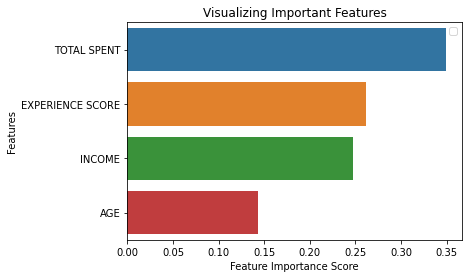

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

From the above figure the features that selected for applying machine learning models are : feature_cols=['INCOME','EXPERIENCE SCORE','TOTAL SPENT']

**Decision Tree for Classification**

**Feature Selection**

In [ ]:
#split dataset in features and target variable
X = customer_all_view[['INCOME','AGE','EXPERIENCE SCORE','TOTAL SPENT','LOYALTY GROUP']]
X = X.drop('LOYALTY GROUP', axis=1)
y = customer_all_view['LOYALTY GROUP']
feature_cols=['INCOME','EXPERIENCE SCORE','TOTAL SPENT']


**Splitting Data**

In [ ]:
X_train,X_test,Y_train,Y_test =train_test_split(X[['EXPERIENCE SCORE','TOTAL SPENT','INCOME']],y, test_size=0.2,random_state=42)

**Building Decision Tree Model**

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


**Evaluating Model**

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.75


**Visualizing Decision Trees**

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


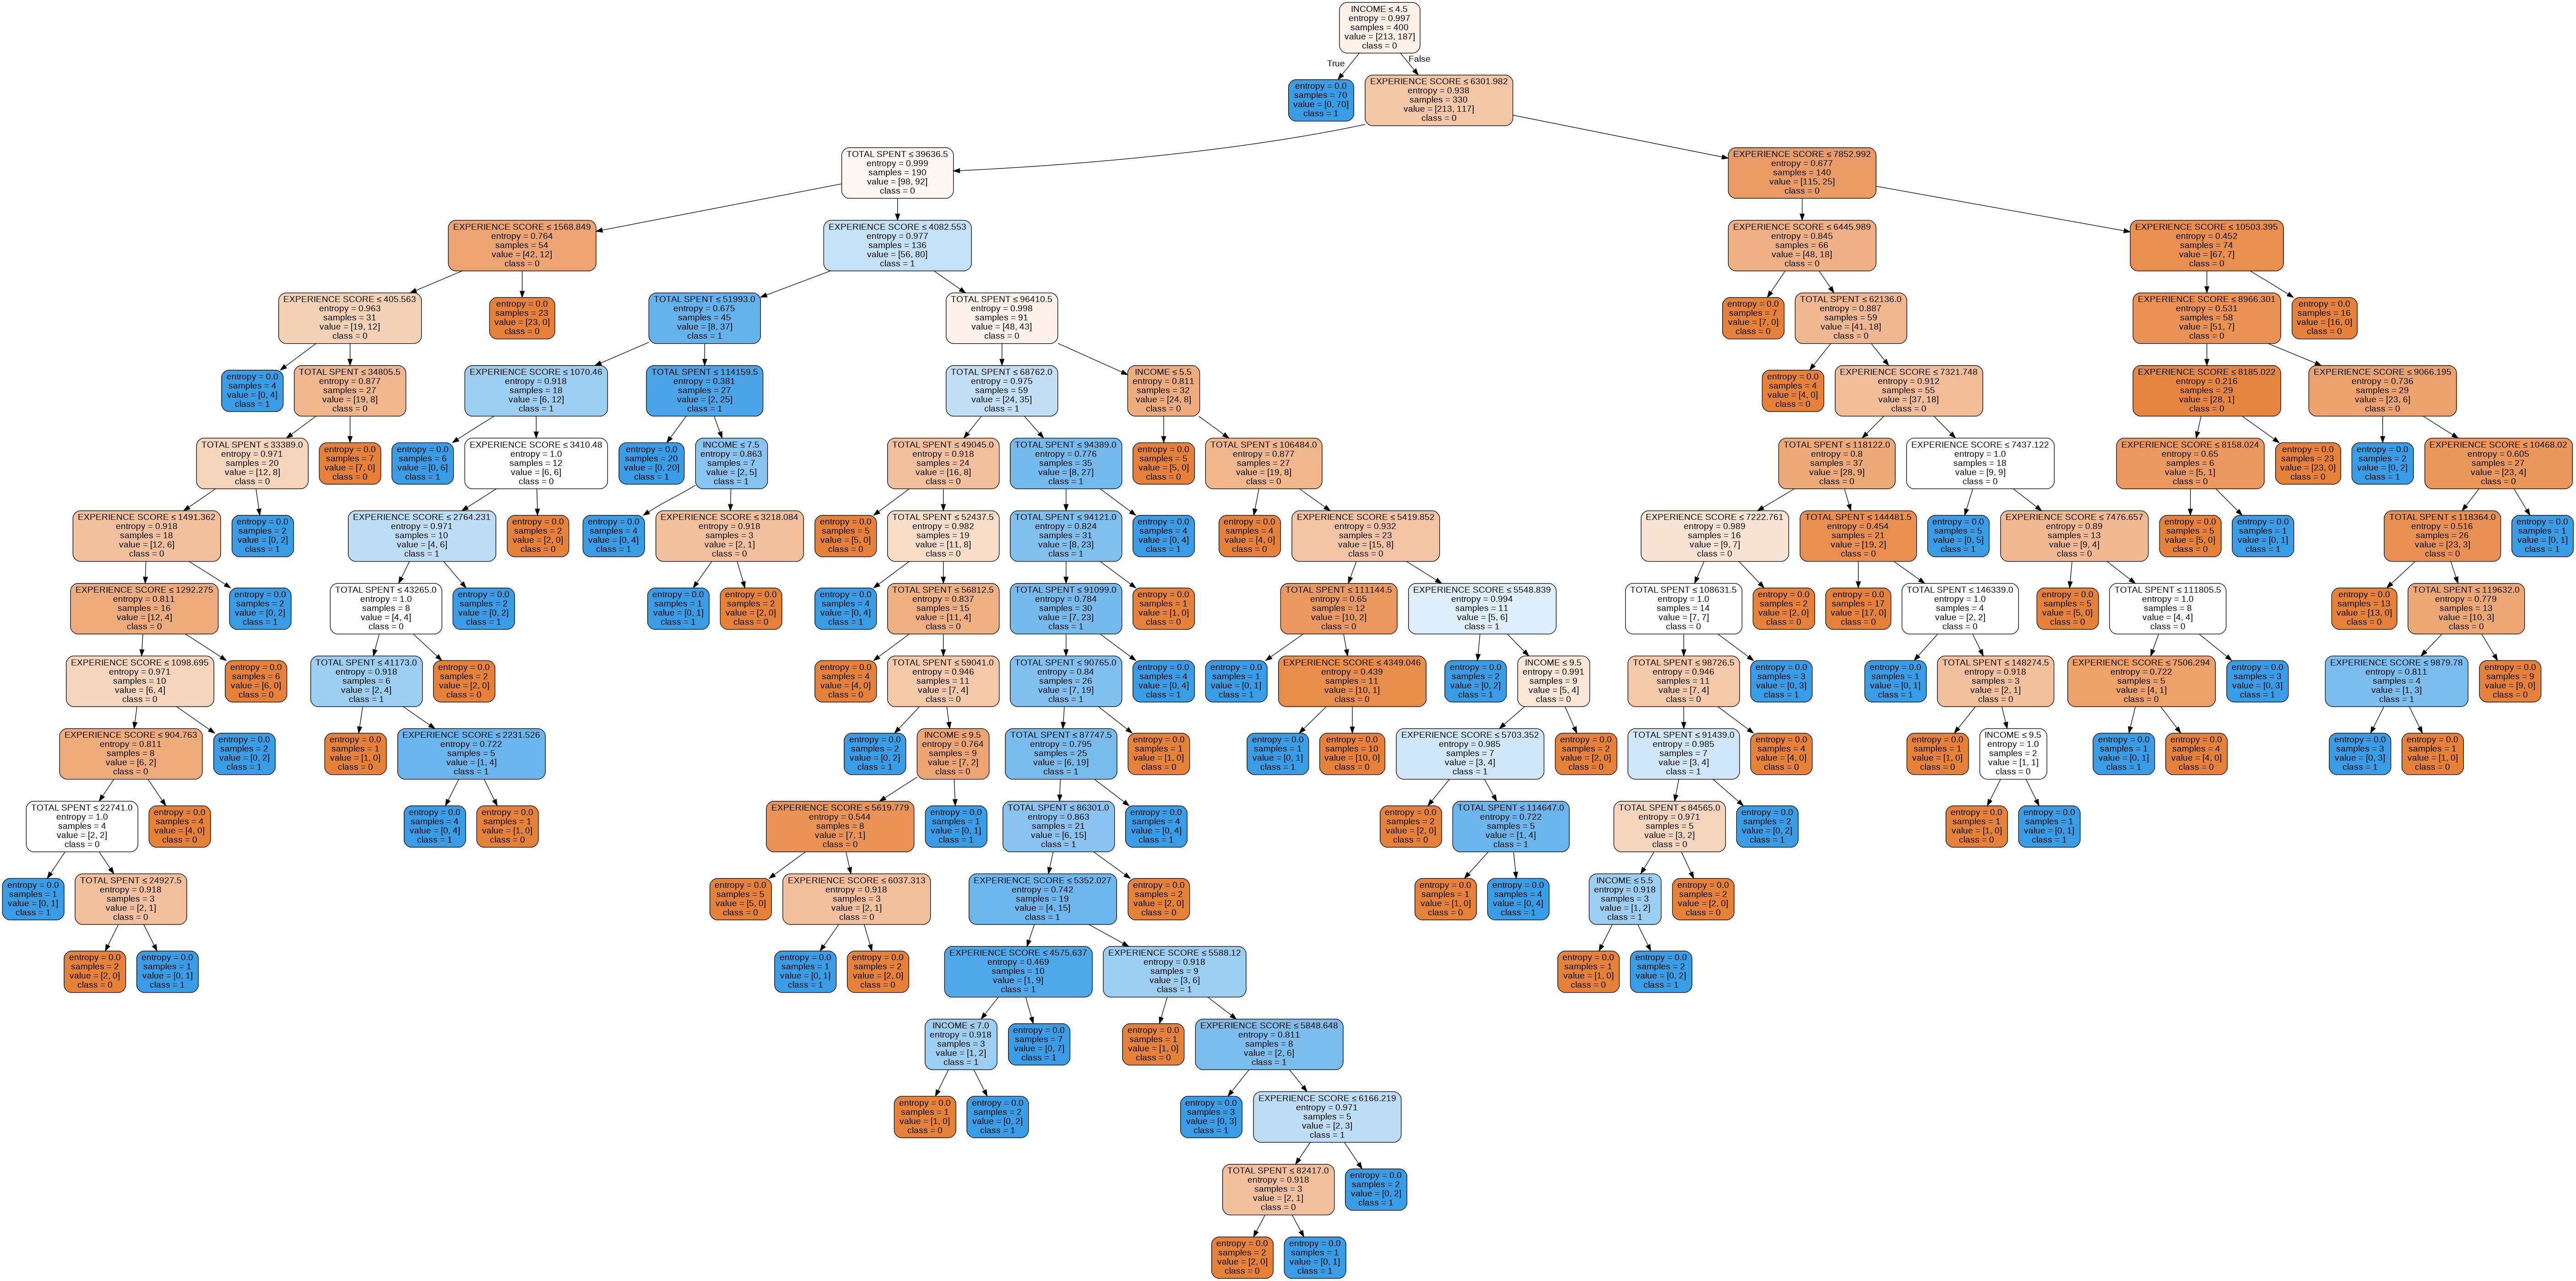

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Customers.png')
Image(graph.create_png())

**Building Decision Tree Model With K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import KFold

#New generic training and testing function with accuracy as the performance metric
def Training_Testing_Accuracy_Only(model,train_data,train_labels,test_data,test_labels):
    model.fit(train_data,train_labels)
    predicted = model.predict(test_data)
    acc = metrics.accuracy_score(test_labels,predicted)
    print ('accuracy = '+str(acc*100)+'%')
    return(acc)

**Setting the number of folds**

In [ ]:
kf = KFold(n_splits=10)

**Training and testing the decision tree model by using 10-fold cross-validation**

In [ ]:
clf_Tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
accuracy_list=[]

In [ ]:
for train_index, test_index in kf.split(X):
    X_train,X_test=X.iloc[train_index], X.iloc[test_index]
    Y_train,Y_test=y.iloc[train_index], y.iloc[test_index]   
    accuracy=Training_Testing_Accuracy_Only(clf_Tree,X_train,Y_train,X_test,Y_test)
    accuracy_list.append(accuracy) 
print("overall_accuracy is %",100 * sum(accuracy_list)/len(accuracy_list))

accuracy = 76.0%
accuracy = 78.0%
accuracy = 72.0%
accuracy = 74.0%
accuracy = 72.0%
accuracy = 82.0%
accuracy = 68.0%
accuracy = 72.0%
accuracy = 74.0%
accuracy = 80.0%
overall_accuracy is % 74.8


**K-Nearest Neighbor Classifier**

**Building The Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_kNN = KNeighborsClassifier(n_neighbors=8)
clf_kNN.fit(X_train, Y_train)
predicted = clf_kNN.predict(X_test)

**Evaluating Model**

In [ ]:
acc = metrics.accuracy_score(Y_test,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (metrics.classification_report(Y_test,predicted))

accuracy = 74.0%
              precision    recall  f1-score   support

    enrolled       0.74      0.87      0.80        30
 notenrolled       0.73      0.55      0.63        20

    accuracy                           0.74        50
   macro avg       0.74      0.71      0.71        50
weighted avg       0.74      0.74      0.73        50



**K-Nearest Neighbor Classifier Wih K-Fold Cross Validation**

**Training and testing the K-Nearest Neighbor model**

In [ ]:
accuracy_list_for_each_K_neighbours=[]

In [ ]:
for k_neighbours in range(1,15):
    clf_NN = KNeighborsClassifier(n_neighbors=k_neighbours)
    accuracy_list_k_fold = []
    for train_index, test_index in kf.split(X):
        X_train,X_test=X.iloc[train_index], X.iloc[test_index]
        Y_train,Y_test=y.iloc[train_index], y.iloc[test_index]    
        accuracy=Training_Testing_Accuracy_Only(clf_NN,X_train,Y_train,X_test,Y_test)
        accuracy_list_k_fold.append(accuracy)
    accuracy_list_for_each_K_neighbours.append(100 * sum(accuracy_list_k_fold)/len(accuracy_list_k_fold))
    print("Overall Accuracy for K_neighbours=",k_neighbours,"is",accuracy_list_for_each_K_neighbours[k_neighbours-1])

accuracy = 70.0%
accuracy = 70.0%
accuracy = 68.0%
accuracy = 70.0%
accuracy = 54.0%
accuracy = 62.0%
accuracy = 74.0%
accuracy = 60.0%
accuracy = 74.0%
accuracy = 68.0%
Overall Accuracy for K_neighbours= 1 is 67.0
accuracy = 68.0%
accuracy = 66.0%
accuracy = 62.0%
accuracy = 66.0%
accuracy = 52.0%
accuracy = 62.0%
accuracy = 64.0%
accuracy = 64.0%
accuracy = 57.99999999999999%
accuracy = 74.0%
Overall Accuracy for K_neighbours= 2 is 63.6
accuracy = 74.0%
accuracy = 62.0%
accuracy = 70.0%
accuracy = 57.99999999999999%
accuracy = 74.0%
accuracy = 62.0%
accuracy = 64.0%
accuracy = 57.99999999999999%
accuracy = 64.0%
accuracy = 76.0%
Overall Accuracy for K_neighbours= 3 is 66.19999999999999
accuracy = 68.0%
accuracy = 68.0%
accuracy = 62.0%
accuracy = 66.0%
accuracy = 76.0%
accuracy = 66.0%
accuracy = 70.0%
accuracy = 57.99999999999999%
accuracy = 64.0%
accuracy = 84.0%
Overall Accuracy for K_neighbours= 4 is 68.2
accuracy = 74.0%
accuracy = 62.0%
accuracy = 66.0%
accuracy = 68.0%
accurac

**Identify the optimum K from plotting the accuracy list**

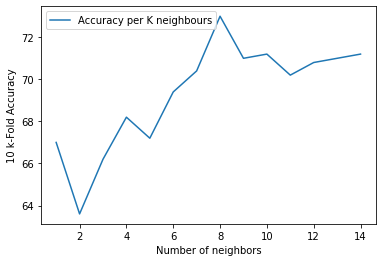

In [ ]:
plt.plot(range(1,15),accuracy_list_for_each_K_neighbours)
plt.legend(['Accuracy per K neighbours'], loc='upper left')
plt.xlabel("Number of neighbors")
plt.ylabel("10 k-Fold Accuracy")
plt.show()

**K-Means Clustering Algorithm**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

**Feature Selection**

In [ ]:
cluster_input=customer_all_view[['INCOME','TOTAL SPENT']]
cluster_input.head(5)

,INCOME,TOTAL SPENT
0,133498,6826.770
1,94475,5062.451
2,88610,8562.440
3,84313,5522.694
4,51498,213.512


**Initialize a K-means model with four clusters**

In [ ]:
Kmeans_model=KMeans(n_clusters=4)

**Run the K-means cluster algorithm on the input by using “fit_predict” method**

In [ ]:
cluster_output = Kmeans_model.fit_predict(cluster_input)
cluster_output

array([2, 1, 0, 0, 3, 2, 0, 1, 1, 0, 3, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1,
       1, 3, 1, 1, 0, 3, 3, 2, 0, 3, 3, 1, 3, 3, 0, 1, 1, 3, 3, 0, 0, 0,
       2, 3, 3, 0, 2, 3, 1, 3, 0, 3, 1, 3, 1, 1, 1, 3, 0, 1, 2, 1, 2, 0,
       0, 1, 3, 0, 0, 3, 0, 0, 2, 3, 0, 3, 0, 2, 0, 1, 2, 1, 0, 1, 2, 3,
       0, 3, 1, 2, 1, 1, 1, 0, 1, 3, 2, 1, 3, 3, 3, 3, 0, 1, 1, 3, 0, 3,
       3, 3, 0, 3, 1, 3, 2, 2, 0, 0, 3, 1, 1, 3, 0, 0, 1, 0, 3, 2, 0, 0,
       3, 0, 2, 1, 2, 2, 1, 0, 0, 3, 3, 3, 0, 1, 1, 3, 1, 0, 0, 1, 1, 1,
       0, 1, 3, 3, 1, 3, 2, 3, 2, 1, 3, 0, 3, 2, 0, 3, 2, 3, 1, 1, 2, 3,
       2, 2, 1, 3, 2, 3, 0, 3, 1, 2, 1, 1, 3, 2, 3, 1, 1, 2, 1, 2, 1, 2,
       1, 0, 1, 3, 2, 2, 1, 3, 0, 2, 2, 2, 2, 3, 1, 0, 2, 1, 0, 1, 0, 3,
       0, 3, 1, 3, 3, 0, 1, 3, 3, 0, 1, 0, 1, 0, 0, 3, 1, 2, 3, 3, 3, 0,
       0, 0, 0, 3, 1, 1, 2, 3, 0, 1, 3, 1, 3, 0, 3, 2, 1, 1, 3, 2, 3, 0,
       0, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 3, 2, 0, 1, 1, 1, 0, 0, 0, 2, 0,
       1, 0, 1, 2, 2, 3, 3, 2, 3, 3, 3, 3, 0, 0, 3,

**Convert the 1-dimensional NumPy array to a Pandas data frame**

In [ ]:
cluster_output_pd=pd.DataFrame(cluster_output,columns=['segment'])
cluster_output_pd.head()

,segment
0,2
1,1
2,0
3,0
4,3


**Merge the cluster input and the cluster output, which contains the cluster index**

In [ ]:
segment_DF=pd.concat([cluster_input,cluster_output_pd],axis=1)
segment_DF.head()

,INCOME,TOTAL SPENT,segment
0,133498,6826.770,2
1,94475,5062.451,1
2,88610,8562.440,0
3,84313,5522.694,0
4,51498,213.512,3


**The cluster centroids that are computed by the algorithm can be found by using a method that is called “cluster_centers”**

In [ ]:
Kmeans_model.cluster_centers_

array([[ 76337.14084507,   5260.48642958],
       [110254.62121212,   7744.12999242],
       [138471.625     ,   6972.91513636],
       [ 38530.82608696,   2260.43836232]])

**Select only those segments that belong to the first cluster (cluster index=0)**

In [ ]:
segment_DF[segment_DF.segment==0].head()

,INCOME,TOTAL SPENT,segment
2,88610,8562.440,0
3,84313,5522.694,0
6,65002,5224.616,0
9,76994,6620.147,0
12,88829,4685.902,0


**Plot the clustering results**

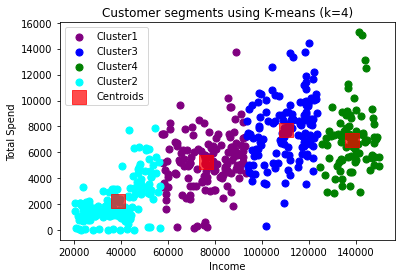

In [ ]:
plt.scatter(segment_DF[segment_DF.segment==0]['INCOME'],segment_DF[segment_DF.segment==0]['TOTAL SPENT'],s=50, c='purple',label='Cluster1')

plt.scatter(segment_DF[segment_DF.segment==1]['INCOME'],segment_DF[segment_DF.segment==1]['TOTAL SPENT'],s=50, c='blue',label='Cluster3')

plt.scatter(segment_DF[segment_DF.segment==2]['INCOME'],segment_DF[segment_DF.segment==2]['TOTAL SPENT'],s=50, c='green',label='Cluster4')

plt.scatter(segment_DF[segment_DF.segment==3]['INCOME'],segment_DF[segment_DF.segment==3]['TOTAL SPENT'],s=50, c='cyan',label='Cluster2')

plt.scatter(Kmeans_model.cluster_centers_[:,0], Kmeans_model.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')

plt.title('Customer segments using K-means (k=4)')

plt.xlabel('Income')

plt.ylabel('Total Spend')

plt.legend()

plt.show()

**Help Retailer X to know all about the different customer segments demographics**

**Merge the clustering output with the customer all view**

In [ ]:
customer_demographics=pd.concat([customer_all_view,cluster_output_pd],axis=1)

customer_demographics.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT,AGE_BINNED,TOTAL SPENT BINNED,segment
0,10001,0,64,133498,5,enrolled,2013-03-06,4,Single,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770,"(61.2, 68.4]","(6117.455, 7641.817]",2
1,10002,0,42,94475,9,notenrolled,NaT,6,Married,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451,"(39.6, 46.8]","(4593.094, 6117.455]",1
2,10003,0,40,88610,9,enrolled,2010-09-02,5,Married,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440,"(39.6, 46.8]","(7641.817, 9166.178]",0
3,10004,0,38,84313,8,enrolled,2015-04-06,1,Single,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694,"(32.4, 39.6]","(4593.094, 6117.455]",0
4,10005,0,30,51498,3,notenrolled,NaT,1,Single,213.512,0.000,0.000,0.000,2015-12-22,213.512,"(25.2, 32.4]","(4.766, 1544.371]",3


**Regarding the “Age” and “household size” aggregations, the calculation is straightforward and can be carried out**

In [ ]:
customer_demographics.groupby('segment').agg({'AGE':'mean','HOUSEHOLD SIZE':'median'})

,AGE,HOUSEHOLD SIZE
segment,,
0,35.661972,3
1,47.416667,3
2,73.420455,2
3,24.449275,2


**calculate the percentage of participation**

In [ ]:
def percent_loyalty(series):
    percent=100 * series.value_counts()['enrolled'] /series.count()
    return percent

**Pass the created function as an aggregate measure in the “agg” command**

In [ ]:
customer_demographics.groupby('segment').agg({'AGE':'mean','HOUSEHOLD SIZE':'median','LOYALTY GROUP': percent_loyalty})

,AGE,HOUSEHOLD SIZE,LOYALTY GROUP
segment,,,
0,35.661972,3,32.394366
1,47.416667,3,66.666667
2,73.420455,2,65.909091
3,24.449275,2,52.173913
